# Comitê de Classificadores | Projeto N1

**GitHub: https://github.com/MachineNeyarning/ClassifiersCommittee**

---

## Grupo:
- Gustavo Henrique Martins
- Ícaro Botelho
- Maria Clara Seixa Scheffel
- Maruan Biasi El Achkar
- Ricardo Falcão Schlieper

### Dataset escolhido: Rain in Australia
- Detalhamento de colunas em: https://github.com/MachineNeyarning/ClassifiersCommittee/tree/main/dataset
- Fonte: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
- Target: RainTomorrow

### Algoritmos escolhidos:
- K-Nearest Neighbors (KNN)
- Decision Tree Classifier (Tree-Based)
- Random Forest Classifier (Tree-Based)
- LightGBM Classifier (Tree-Based)
- CatBoost Classifier (Tree-Based)
- Gaussian Naive Bayes (Naive Bayes)
- Support Vector Classification (SVC)
- Multi-Layer Perceptron (MLPClassifier)
- AdaBoost Classifier (Ensemble Methods)
- Quadratic Discriminant Analysis (QDA)



---
# Preparar Dataset

In [107]:
# Baixar Dataset

import kagglehub
import os

path = kagglehub.dataset_download("jsphyg/weather-dataset-rattle-package")
csv_path = os.path.join(path, 'weatherAUS.csv')


Using Colab cache for faster access to the 'weather-dataset-rattle-package' dataset.


In [108]:
# Criar Dataframe Pandas

import pandas as pd

df = pd.read_csv(csv_path, sep=',', engine='python', on_bad_lines='skip')
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [109]:
# Describe Dataframe Data

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [110]:
# Verificar falta de dados

missing_data = df.isnull().sum()
display(missing_data)

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [111]:
# Remover linhas com dados faltando

df_cleaned = df.dropna()
display(df_cleaned.head())
print(f"Original: {df.shape}")
print(f"Limpo: {df_cleaned.shape}")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


Original: (145460, 23)
Limpo: (56420, 23)


---
# 12 Algoritmos:

---
## 1) K-Nearest Neighbors (KNN) Falcão

In [112]:
# Copia do dataframe
df_knn = df_cleaned

K-Nearest Neighbors
Acurácia: 0.8405
Taxa de erro: 0.1595
Matriz de confusão:
 [[8217  582]
 [1218 1267]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      8799
           1       0.69      0.51      0.58      2485

    accuracy                           0.84     11284
   macro avg       0.78      0.72      0.74     11284
weighted avg       0.83      0.84      0.83     11284



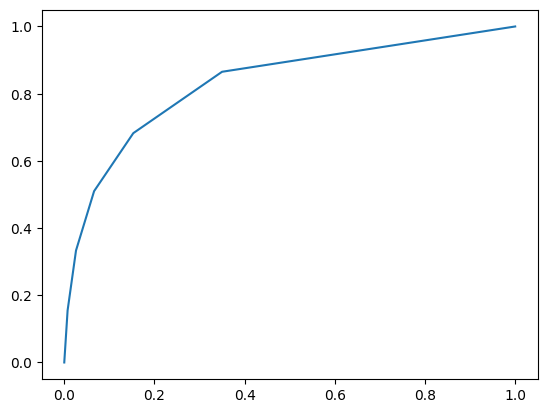

In [113]:
# ========================
# K-Nearest Neighbors (KNN)
# ========================
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Make a fresh copy of the dataframe
df_knn = df_cleaned.copy()

# features (X) e target (y)
X = df_knn.drop(["RainTomorrow", 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)  # variável alvo = "RainTomorrow"
y = df_knn["RainTomorrow"]

# converter TARGET para numerico
le = LabelEncoder()
y = le.fit_transform(y)

# treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalonar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# modelo e prediçoes
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# métricas
accuracy = accuracy_score(y_test, y_pred_knn)
error_rate = 1 - accuracy
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors")
print(f"Acurácia: {accuracy:.4f}")
print(f"Taxa de erro: {error_rate:.4f}")
print("Matriz de confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

# ROC Curve
y_prob_knn = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')

# Keep the plot code from the Random Forest cell to display all ROC curves together
# plt.plot([0,1], [0,1], "k--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Tree Based Models")
# plt.legend()
# plt.show()

---
## 2) Decision Tree Classifier (Tree-Based) | Gustavo

In [114]:
# Copia do dataframe
df_dtc = df_cleaned

Decision Tree
Acurácia: 0.7979439914923786
[[7649 1150]
 [1130 1355]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8799
           1       0.54      0.55      0.54      2485

    accuracy                           0.80     11284
   macro avg       0.71      0.71      0.71     11284
weighted avg       0.80      0.80      0.80     11284



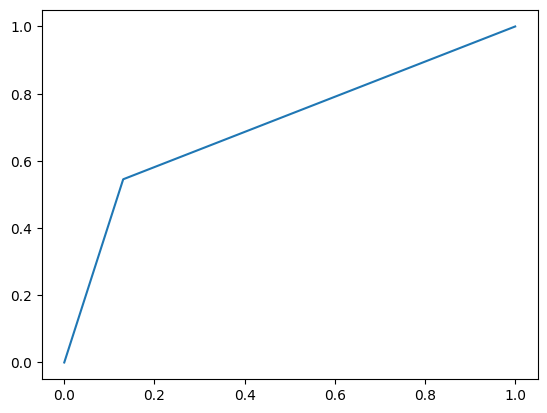

In [115]:
# ========================
# Decision Tree Classifier
# ========================
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# features (X) e target (y)
X = df_dtc.drop(["RainTomorrow", 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)  # variável alvo = "RainTomorrow"
y = df_dtc["RainTomorrow"]

# converter TARGET para numerico
le = LabelEncoder()
y = le.fit_transform(y)

# treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo e prediçoes
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# métricas
print("Decision Tree")
print("Acurácia:", accuracy_score(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

# ROC Curve
y_prob_dtc = dtc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_dtc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')

# Keep the plot code from the Random Forest cell to display all ROC curves together
# plt.plot([0,1], [0,1], "k--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Tree Based Models")
# plt.legend()
# plt.show()

---
## 3) Random Forest Classifier (Tree-Based) | Gustavo

In [116]:
# Copia do dataframe
df_rfc = df_cleaned

Random Forest
Acurácia: 0.8599787309464729
[[8390  409]
 [1171 1314]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8799
           1       0.76      0.53      0.62      2485

    accuracy                           0.86     11284
   macro avg       0.82      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



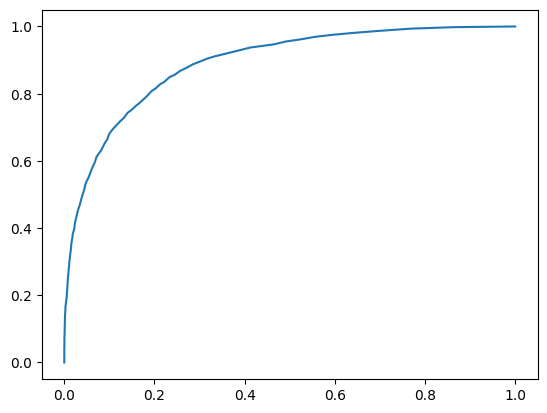

In [117]:
# ========================
# Random Forest Classifier
# ========================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# features (X) e target (y)
X = df_rfc.drop(["RainTomorrow", 'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)
y = df_rfc["RainTomorrow"]

# Convert TARGET to numeric
le = LabelEncoder()
y = le.fit_transform(y)

# treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo e prediçoes
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

# métricas
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

# ROC Curve
y_prob_rfc = rfc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rfc)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')

# gráfico ROC
# plt.plot([0,1], [0,1], "k--")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve - Tree Based Models")
# plt.legend()
# plt.show()

---
## 4) XGBoost (Tree-Based) | Maruan

In [118]:
# Copia do dataframe
df_xgb = df_cleaned

In [119]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [120]:
# Remover tabelas nao numericas e o target
X_xgb = df_xgb.drop(['Date', 'Location', 'RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
y_xgb = df_xgb['RainTomorrow']

# Converter TARGET para numerico
le = LabelEncoder()
y_xgb = le.fit_transform(y_xgb)

In [121]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42, stratify=y_xgb)

In [122]:
# XGBoost model

# resultado com parametros padrao: 85.69%
xgboost = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

xgboost.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [123]:
# Avaliacao
from sklearn.metrics import confusion_matrix, classification_report

y_pred_xgb = xgboost.predict(X_test_xgb)
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
class_report_xgb = classification_report(y_test_xgb, y_pred_xgb)
error_rate_xgb = 1 - accuracy_xgb


print("XGBoost Evaluation:")
print(f"Acurácia: {accuracy_xgb * 100:.2f}%")
print(f"Taxa de erro: {error_rate_xgb * 100:.2f}%")
print("Matriz de confusão:\n", conf_matrix_xgb)
print("Relatório de Classificação:\n", class_report_xgb)

XGBoost Evaluation:
Acurácia: 85.69%
Taxa de erro: 14.31%
Matriz de confusão:
 [[8296  503]
 [1112 1373]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      8799
           1       0.73      0.55      0.63      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.75      0.77     11284
weighted avg       0.85      0.86      0.85     11284



---
## 5) LightGBM Classifier (Tree-Based) | Maruan

In [124]:
# Copia do dataframe
df_lgbm = df_cleaned

In [125]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [126]:
# Remover tabelas nao numericas e o target
X_lgbm = df_lgbm.drop(['Date', 'Location', 'RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
y_lgbm = df_lgbm['RainTomorrow']

# Converter TARGET para numerico
le = LabelEncoder()
y_lgbm = le.fit_transform(y_lgbm)

In [127]:
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.2, random_state=42, stratify=y_lgbm)

In [128]:
# LightGBM model

# resultado com parametros padrao: 85.90%
# melhor resultado com parametros personalizados: 86.46%
lgbm = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=52783,
    learning_rate=0.055,
    num_leaves=80,
    max_depth=-1,
    max_bin=716,
    min_data_in_leaf=60,
    min_sum_hessian_in_leaf=5.0,
    min_gain_to_split=0.01,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=1,
    lambda_l1=0.1,
    lambda_l2=2.0,
    # extra_trees=True,
    # class_weight="balanced",
    n_jobs=-1,
    verbose=-1 # para nao encher de log no console senao o colab fica com 500mb
)

lgbm.fit(
    X_train_lgbm, y_train_lgbm,
    eval_set=[(X_test_lgbm, y_test_lgbm)],
    eval_metric=["auc", "binary_logloss"],
    callbacks=[lgb.early_stopping(100)]
)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[266]	valid_0's auc: 0.900995	valid_0's binary_logloss: 0.312268


LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8,
               lambda_l1=0.1, lambda_l2=2.0, learning_rate=0.055, max_bin=716,
               min_data_in_leaf=60, min_gain_to_split=0.01,
               min_sum_hessian_in_leaf=5.0, n_estimators=52783, n_jobs=-1,
               num_leaves=80, random_state=42, verbose=-1)

In [129]:
# Avaliacao
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_lgbm = lgbm.predict(X_test_lgbm)
accuracy_lgbm = accuracy_score(y_test_lgbm, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test_lgbm, y_pred_lgbm)
class_report_lgbm = classification_report(y_test_lgbm, y_pred_lgbm)
error_rate_lgbm = 1 - accuracy_lgbm


print("LightGBM Evaluation:")
print(f"Acurácia: {accuracy_lgbm * 100:.2f}%")
print(f"Taxa de erro: {error_rate_lgbm * 100:.2f}%")
print("Matriz de confusão:\n", conf_matrix_lgbm)
print("Relatório de Classificação:\n", class_report_lgbm)

LightGBM Evaluation:
Acurácia: 86.46%
Taxa de erro: 13.54%
Matriz de confusão:
 [[8348  451]
 [1077 1408]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      8799
           1       0.76      0.57      0.65      2485

    accuracy                           0.86     11284
   macro avg       0.82      0.76      0.78     11284
weighted avg       0.86      0.86      0.86     11284



---
## 6) CatBoost Classifier (Tree-Based) | Maruan

In [130]:
# Copia do dataframe
df_cb = df_cleaned

In [131]:
!pip install catboost

import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [132]:
# Remover tabelas nao numericas e o target
X_cb = df_cb.drop(['Date', 'Location', 'RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
y_cb = df_cb['RainTomorrow']

# Converter TARGET para numerico
le = LabelEncoder()
y_cb = le.fit_transform(y_cb)

In [133]:
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_cb, y_cb, test_size=0.2, random_state=42, stratify=y_cb)

In [134]:
# CatBoost Model

# resultado com parametros padrao: 86.46%
# melhor resultado com parametros personalizados: 86.37%

catboost = cb.CatBoostClassifier(
    random_state=40,
    # iterations=5000,
    # learning_rate=0.1,
    # depth=6,
    # l2_leaf_reg=3,
    # model_size_reg=None,
    # colsample_bylevel=0.8,
    # loss_function='Logloss',
    # eval_metric='Accuracy',
    # leaf_estimation_iterations=10,
    # bootstrap_type='Bayesian',
    # bagging_temperature=0.3,
    # random_strength=0.2,
    # auto_class_weights="Balanced",
    # od_type='Iter',
    # od_wait=50,
    verbose=0,
)

catboost.fit(X_train_cb, y_train_cb)

In [135]:
# Avaliacao
from sklearn.metrics import confusion_matrix, classification_report

y_pred_cb = catboost.predict(X_test_cb)
accuracy_cb = accuracy_score(y_test_cb, y_pred_cb)
conf_matrix_cb = confusion_matrix(y_test_cb, y_pred_cb)
class_report_cb = classification_report(y_test_cb, y_pred_cb)
error_rate_cb = 1 - accuracy_cb


print("CatBoost Evaluation:")
print(f"Acurácia: {accuracy_cb * 100:.2f}%")
print(f"Taxa de erro: {error_rate_cb * 100:.2f}%")
print("Matriz de confusão:\n", conf_matrix_cb)
print("Relatório de Classificação:\n", class_report_cb)

CatBoost Evaluation:
Acurácia: 86.33%
Taxa de erro: 13.67%
Matriz de confusão:
 [[8370  429]
 [1113 1372]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      8799
           1       0.76      0.55      0.64      2485

    accuracy                           0.86     11284
   macro avg       0.82      0.75      0.78     11284
weighted avg       0.86      0.86      0.85     11284



---
## 7) Perceptron | Maruan

In [136]:
# Copia do dataframe
df_perceptron = df_cleaned

In [137]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [138]:
# Remover tabelas nao numericas e o target
X_perceptron = df_perceptron.drop(['Date', 'Location', 'RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
y_perceptron = df_perceptron['RainTomorrow']

# Converter TARGET para numerico
le = LabelEncoder()
y_perceptron = le.fit_transform(y_perceptron)

In [139]:
X_train_perceptron, X_test_perceptron, y_train_perceptron, y_test_perceptron = train_test_split(X_perceptron, y_perceptron, test_size=0.2, random_state=42, stratify=y_perceptron)

In [140]:
# escalar
scaler = StandardScaler()
X_train_scaled_perceptron = scaler.fit_transform(X_train_perceptron)
X_test_scaled_perceptron = scaler.transform(X_test_perceptron)

In [141]:
# Perceptron model

perceptron = Perceptron(random_state=43)

perceptron.fit(X_train_scaled_perceptron, y_train_perceptron)

Perceptron(random_state=43)

In [142]:
# Avaliacao
from sklearn.metrics import confusion_matrix, classification_report

y_pred_perceptron = perceptron.predict(X_test_scaled_perceptron)

accuracy_perceptron = accuracy_score(y_test_perceptron, y_pred_perceptron)
conf_matrix_perceptron = confusion_matrix(y_test_perceptron, y_pred_perceptron)
class_report_perceptron = classification_report(y_test_perceptron, y_pred_perceptron)
error_rate_perceptron = 1 - accuracy_perceptron

print("Perceptron Evaluation:")
print(f"Acurácia: {accuracy_perceptron * 100:.2f}%")
print(f"Taxa de erro: {error_rate_perceptron * 100:.2f}%")
print("Matriz de confusão:\n", conf_matrix_perceptron)
print("Relatório de Classificação:\n", class_report_perceptron)

Perceptron Evaluation:
Acurácia: 82.98%
Taxa de erro: 17.02%
Matriz de confusão:
 [[7909  890]
 [1030 1455]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      8799
           1       0.62      0.59      0.60      2485

    accuracy                           0.83     11284
   macro avg       0.75      0.74      0.75     11284
weighted avg       0.83      0.83      0.83     11284



---
## 8) Gaussian Naive Bayes (Naive Bayes)  Falcão

In [143]:
# Copia do dataframe
df_gnb = df_cleaned

### Conferir Data

In [144]:
if 'Date' in df_gnb.columns:
    df_gnb = df_gnb.drop(columns=['Date'])

### Transformar colunas categóricas em números

In [145]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

### # Separar X e y (ajuste o nome da coluna alvo)

In [146]:
# Separar X e y (ajuste o nome da coluna alvo)
X = df_gnb.drop(columns=['RainTomorrow'])
y = df_gnb['RainTomorrow']

# Converter variáveis categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

### Dividir e treinar

In [147]:
# Separar X e y (ajuste o nome da coluna alvo)
X = df_gnb.drop(columns=['RainTomorrow'])
y = df_gnb['RainTomorrow']

# Converter variáveis categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Escalonar variáveis

In [148]:
from sklearn.preprocessing import StandardScaler

# Escalonar variáveis
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Treinar Gaussian Naive Bayes

In [149]:
# Converter variáveis categóricas em variáveis dummy (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

In [150]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Ensure the data is in a suitable format (e.g., NumPy array with float type)
X_train = np.asarray(X_train, dtype=np.float64)
X_test = np.asarray(X_test, dtype=np.float64)


gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [151]:
print("Missing values in X_train after preprocessing:")
print(pd.DataFrame(X_train).isnull().sum().sum())

print("Missing values in X_test after preprocessing:")
print(pd.DataFrame(X_test).isnull().sum().sum())

Missing values in X_train after preprocessing:
0
Missing values in X_test after preprocessing:
0


### Avaliar

In [152]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Gaussian Naive Bayes Evaluation:')
print(f'Acurácia: {accuracy:.2f}')
print(f'Taxa de erro: {error_rate:.2f}')
print('Matriz de confusão:\n', conf_matrix)
print('Relatório de Classificação:\n', class_report)

Gaussian Naive Bayes Evaluation:
Acurácia: 0.73
Taxa de erro: 0.27
Matriz de confusão:
 [[9675 3481]
 [1064 2706]]
Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.90      0.74      0.81     13156
         Yes       0.44      0.72      0.54      3770

    accuracy                           0.73     16926
   macro avg       0.67      0.73      0.68     16926
weighted avg       0.80      0.73      0.75     16926



---
## 9) Support Vector Classification (SVC) | MC

In [153]:
# Copia do dataframe
df_svc = df_cleaned

In [154]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [155]:
# Separando Features e target
X = df_svc.drop(columns=[
    'RainTomorrow', 'Date', 'Location',
    'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'
])
y = df_svc['RainTomorrow']

In [156]:
# Codificando Target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [157]:
# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [158]:
# Escalando
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [159]:
# Treinando svc
svc = SVC(kernel='rbf', C=1.0, random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [160]:
# Previsao
y_pred = svc.predict(X_test_scaled)

In [161]:
# Avaliacao
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("SVC Evaluation:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Taxa de erro: {error_rate:.2f}")
print("Matriz de confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

SVC Evaluation:
Acurácia: 0.86
Taxa de erro: 0.14
Matriz de confusão:
 [[8468  331]
 [1266 1219]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      8799
           1       0.79      0.49      0.60      2485

    accuracy                           0.86     11284
   macro avg       0.83      0.73      0.76     11284
weighted avg       0.85      0.86      0.85     11284



---
## 10) Multi-Layer Perceptron (MLPClassifier) | Ícaro

In [162]:
# Copia do dataframe
df_mlp = df_cleaned

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [164]:
# Separar features e target
X = df_mlp.drop(columns=[
    'RainTomorrow', 'Date', 'Location',
    'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'
])

y = df_mlp['RainTomorrow']

In [165]:

# Dividindo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [166]:
# Escalando
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
# Treinando
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),   # uma camada oculta com 100 neurônios
    max_iter=300,                # número máximo de iterações
    random_state=42,
    early_stopping=True,         # para evitar overfitting
    verbose=False                 # mostrar progresso durante o treinamento
)

# Convert to numpy array with float type to avoid the TypeError
X_train_scaled = X_train_scaled.astype('float64')
X_test_scaled = X_test_scaled.astype('float64')

# Impute any remaining missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Convert target variable to numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


mlp.fit(X_train_scaled, y_train_encoded)

MLPClassifier(early_stopping=True, max_iter=300, random_state=42)

In [168]:
# Predicao
y_pred = mlp.predict(X_test_scaled)


In [169]:
# Avaliacao
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test_encoded, y_pred)
error_rate = 1 - accuracy
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
report_mlp = classification_report(y_test_encoded, y_pred)

print("MLPClassifier Evaluation:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Taxa de erro: {error_rate:.2f}")
print("Matriz de confusão:\n", conf_matrix)
print("Classification Report:\n", report_mlp)

MLPClassifier Evaluation:
Acurácia: 0.86
Taxa de erro: 0.14
Matriz de confusão:
 [[8341  458]
 [1143 1342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      8799
           1       0.75      0.54      0.63      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



---
## 11) AdaBoost Classifier (Ensemble Methods) | MC

In [170]:

# Copia do dataframe
df_ada = df_cleaned

In [171]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [172]:
# Separar features e target
X = df_ada.drop(columns=[
    'RainTomorrow', 'Date', 'Location',
    'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'
])
y = df_ada['RainTomorrow']

In [173]:
# Codificando Target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [174]:
# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [175]:
# Escalando
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [176]:
# Treinando ada
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [177]:
# Previsao
y_pred_ada = ada.predict(X_test_scaled)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)

In [178]:
# Avaliacao
error_rate_ada = 1 - accuracy_ada

print("AdaBoost Evaluation:")
print(f"Acurácia: {accuracy_ada:.2f}")
print(f"Taxa de erro: {error_rate_ada:.2f}")
print("Matriz de confusão:\n", conf_matrix_ada)
print("Relatório de Classificação:\n", class_report_ada)

AdaBoost Evaluation:
Acurácia: 0.85
Taxa de erro: 0.15
Matriz de confusão:
 [[8314  485]
 [1205 1280]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      8799
           1       0.73      0.52      0.60      2485

    accuracy                           0.85     11284
   macro avg       0.80      0.73      0.76     11284
weighted avg       0.84      0.85      0.84     11284



---
## 12) Quadratic Discriminant Analysis (QDA) | Ícaro

In [179]:
# Copia do dataframe
df_qda = df_cleaned

In [180]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [181]:
# Separa feature de target
X = df_qda.drop(columns=[
    'RainTomorrow', 'Date', 'Location',
    'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'
])
y = df_qda['RainTomorrow']

In [182]:
# Dividir os dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 )

In [183]:
# Treinar
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [184]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_qda = qda.predict(X_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
class_report_qda = classification_report(y_test, y_pred_qda)
error_rate_qda = 1 - accuracy_qda

print("QDA Evaluation:")
print(f"Acurácia: {accuracy_qda * 100:.2f}%")
print(f"Taxa de erro: {error_rate_qda * 100:.2f}%")
print("Matriz de confusão:\n", conf_matrix_qda)
print("Relatório de Classificação:\n", class_report_qda)

QDA Evaluation:
Acurácia: 83.81%
Taxa de erro: 16.19%
Matriz de confusão:
 [[8079  720]
 [1107 1378]]
Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.88      0.92      0.90      8799
         Yes       0.66      0.55      0.60      2485

    accuracy                           0.84     11284
   macro avg       0.77      0.74      0.75     11284
weighted avg       0.83      0.84      0.83     11284



---
# Comite Classificador:

In [185]:
# Copia do dataframe
df_comittee = df_cleaned

In [186]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [187]:
# Remover tabelas nao numericas e o target
X_committee = df_comittee.drop(['Date', 'Location', 'RainToday', 'RainTomorrow', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
y_committee = df_comittee['RainTomorrow']

# Converter TARGET para numerico
le = LabelEncoder()
y_committee = le.fit_transform(y_committee)

In [188]:
# mesma coisa dos classifiers mas para o comite
X_train_committee, X_test_committee, y_train_committee, y_test_committee = train_test_split(X_committee, y_committee, test_size=0.2, random_state=42, stratify=y_committee)

In [189]:
# QUAIS CLASSIFICADORES VAO SER USADOS NO COMITE - QUANDO TERMINAREM UM ALGORITIMO NOVO, COLOCA ELE AQUI !!!!!!!!!!!!!
estimators = [('knn', knn), ('decision_tree', dtc), ('random_forest', rfc), ('xgboost', xgboost), ('lgbm', lgbm), ('catboost', catboost), ('perceptron', perceptron), ('gaussian_nb', gnb), ('svc', svc), ('mlp', mlp), ('adaboost', ada), ('qda', qda)]

In [190]:
# Classifiers Comittee

# Tipos de voting
# 'hard' = maioria
# 'soft' usa pesos, weights=[]
# weights_acc = [accuracy_lgbm, accuracy_cb, accuracy_mlp] # pesos sendo a acurracy de cada modelo

committee = VotingClassifier(estimators=estimators, voting='hard')


committee.fit(X_train_committee, y_train_committee)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None...
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x78886ae13f50>),
                             ('perceptron', Perceptron(random_state=43)),
                             ('gaussian_nb', GaussianNB()),
                             ('svc', SVC(random_state=42)),
                             ('mlp',
                              MLPClassifier(early_stopping=True, max_iter=300,
                                            random_state=42)),
                             ('adaboost',
                              AdaBoostClassifier(n_estimators=100,
                                                 random_state=42)),
                             ('qda', QuadraticDiscriminantAnalysis())])

In [191]:
# Avaliacao

from sklearn.metrics import f1_score

# RESULTADOS COM APENAS LightGBM e CatBoost (maruan)
# Acurracy com HARD VOTING: 85.97%
# Acurracy com SOFT e accuracy dos algoritimos como weights: 85.86%
# tentei fazer um grid search pelos melhores pesos mas rodou por 6 horas e crashou
# cada vez que eu boto um algoritimo novo fica pior KKKKKKKKKKKKKKKKKKKK
# MLPClassifier added to the committee

accuracy_committee = committee.score(X_test_committee, y_test_committee)
y_pred_committee = committee.predict(X_test_committee)
accuracyf1_committee = f1_score(y_test_committee, y_pred_committee)


print(f"Classifier Committee Accuracy: {accuracy_committee * 100:.2f}%")
print(f"Classifier Committee F1-score: {accuracyf1_committee * 100:.2f}%")

print('------------------------------------------')
algorithm_names = [name for name, _ in estimators]
print(f"Algoritmos do Comite: {algorithm_names}")

Classifier Committee Accuracy: 85.95%
Classifier Committee F1-score: 60.27%
------------------------------------------
Algoritmos do Comite: ['knn', 'decision_tree', 'random_forest', 'xgboost', 'lgbm', 'catboost', 'perceptron', 'gaussian_nb', 'svc', 'mlp', 'adaboost', 'qda']


---
#### sugestao de outros algoritmos se alguem quiser fazer mais:


*   Logistic Regression
*   SGDClassifier
*   Passive Aggressive Classifier (nao sei se funcionaria aqui)
*   Extra Trees Classifier (tipo um random forest ao quadrado)
*   GradientBoostingClassifier
*   HistGradientBoostingClassifier (uma versao customizada do XGBoost/LightGBM)
*   Linear Discriminant Analysis
*   LogitBoost
*   Bagged Perceptrons
*   AdaBoost com perceptrons dentro

